## **Pizza Sales Analysis**
An analytical overview of pizza order patterns, revenue trends, and customer preferences.


### Import Required Libraries


In [153]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datasets


In [154]:
df = pd.read_csv("pizza_sales.csv")

### --> Metadata of Raw data

In [155]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [156]:
print("The metadata of dataset : " , df.shape)
print("The Rows of dataset : " , df.shape[0])
print("The Columns of dataset : " , df.shape[1])

The metadata of dataset :  (48620, 12)
The Rows of dataset :  48620
The Columns of dataset :  12


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [158]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

## Key Performance Indicators (KPIs)

- **Total Revenue** = Sum of `total_price`
- **Total Pizzas Sold** = Sum of `quantity`
- **Total Orders** = Count of unique `order_id`
- **Average Order Value (AOV)** = Total Revenue ÷ Total Orders
- **Average Pizzas per Order** = Total Pizzas Sold ÷ Total Orders


In [159]:
print("Key Performance Indicators (KPIs)\n")

TotalRevenue = df['total_price'].sum()
print(f"Total revenue :${TotalRevenue:,.2f}")

TotalPizzasSold = df['quantity'].sum()
print(f"Total pizzas sold :{TotalPizzasSold:,}'s")

TotalOrders = df['order_id'].nunique()
print(f"Total orders :{TotalOrders:,}'s")

AverageOrderValue = TotalRevenue / TotalOrders
print(f"Average order value :${AverageOrderValue:.2f}")

AveragePizzaPerOrder = TotalPizzasSold / TotalOrders
print(f"Average Pizza per Order :{AveragePizzaPerOrder:.1f}'s")

Key Performance Indicators (KPIs)

Total revenue :$817,860.05
Total pizzas sold :49,574's
Total orders :21,350's
Average order value :$38.31
Average Pizza per Order :2.3's


## ->Analysis & Visualizations

### •Ingredient Analysis
#### By identifying the most common ingredients, the store can optimize inventory management, reduce waste, and ensure sufficient stock of high-demand items.

#### The most used ingredients are Garlic, Tomatoes, Red Onions, Red Peppers, and Mozzarella Cheese.


In [160]:
ingredient = (
    df['pizza_ingredients'].str.split(",")   # Split ingredients in each row by comma
      .explode()                             # Turn the list of ingredients into separate rows
      .str.strip()                           # Remove extra spaces around ingredient names
      .value_counts()                        # Count how many times each ingredient appears
      .reset_index()                         # Convert the result into a DataFrame
      .rename(columns={'index':'ingredient','Pizza_Ingredient':'Counts'})
     )
print(ingredient.head())

   pizza_ingredients  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333


### • Daily Orders Trend

A bar/line chart showing **number of orders across days of the week**.  
This visualization is useful for **staffing decisions**, **inventory planning**, and **operational scheduling**.

#### **Insights:**
- Order activity **increases steadily from Monday to Friday**.
- **Friday** records the **highest number of orders**, indicating peak customer activity.
- Orders **decline on the weekend**, with **Sunday** showing the **lowest order volume**.


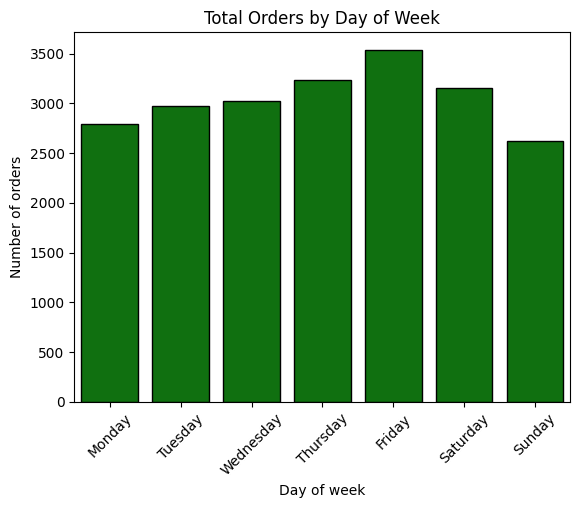

In [161]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst = True)

df['day_name'] = df['order_date'].dt.day_name()

weekday_order = ["Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday" , "Sunday" ]

df['day_name'] = pd.Categorical(df['day_name'] , categories = weekday_order  )

orders_by_day = df.groupby('day_name'  , observed = False )['order_id'].nunique().reset_index()

# ax = orders_by_day.plot(kind = 'bar' , figsize = ( 8 , 5) , color = 'green' , edgecolor = 'black') #through matplotlib(also remove .rest_index())
sns.barplot(data=orders_by_day, x='day_name', y='order_id' , color = 'green' , edgecolor = 'black') #through seaborn

plt.title("Total Orders by Day of Week")
plt.xlabel("Day of week")
plt.xticks(rotation = 45)
plt.ylabel("Number of orders")
plt.show()

### • Hourly Revenue Trend

A bar/line chart showing **total revenue generated during each hour of the day**.  
This visualization is useful for **staff scheduling**, **kitchen preparation**, **inventory planning**, and **delivery management**.

#### **Insights:**
- Revenue begins to **rise from late morning**, around **11 AM**.
- The **highest revenue occurs between 12 PM and 2 PM**, indicating a **lunch peak period**.
- Another **strong revenue period** is seen between **5 PM and 8 PM**, reflecting **dinner-time demand**.
- Revenue **drops significantly after 9 PM**, with minimal orders late at night.
- This pattern highlights **meal-time driven customer behavior**, useful for optimizing operations and resource allocation.


Text(0.5, 1.0, 'Total revenue by hour of day')

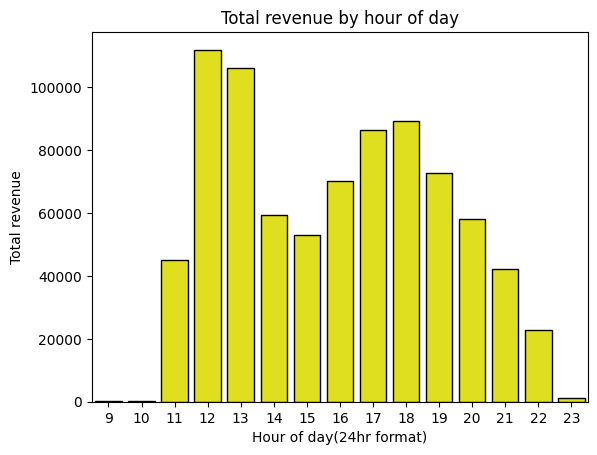

In [162]:
df['order_time'] = pd.to_datetime(df['order_time'] , format = '%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

orders_by_hour = df.groupby('order_hour' , observed = False )['total_price'].sum().reset_index()

sns.barplot(data = orders_by_hour , x = 'order_hour' ,y = 'total_price' , color = 'yellow' , edgecolor = 'black' )
plt.xlabel('Hour of day(24hr format)')
plt.ylabel("Total revenue")
plt.title('Total revenue by hour of day')

### • Monthly Order Trend

A line chart showing **total number of orders received each month** throughout the year.  
This visualization helps in identifying **seasonal demand variations**, **operational planning needs**, and **resource scheduling**.

#### **Insights:**
- Order volume remains **consistently stable** across most months, reflecting steady customer engagement.
- The **highest number of orders occurs in July**, indicating a strong demand peak during the mid-year.
- **September and October** show a **noticeable decline**, representing a mild seasonal slowdown.
- Despite small fluctuations, the overall trend suggests **reliable and predictable monthly demand**, supporting stable planning and inventory management.


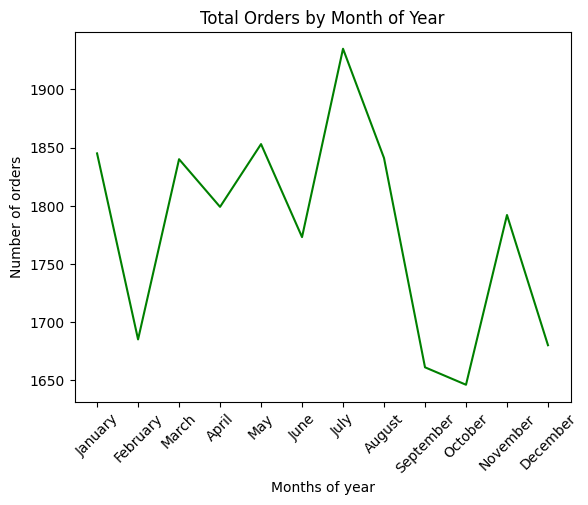

In [163]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst = True)

df['month_name'] = df['order_date'].dt.month_name()

month_order = ["January","February","March","April","May","June","July","August","September","October","November","December"]
df['month_name'] = pd.Categorical(df['month_name'] , categories = month_order  )

orders_by_month = df.groupby('month_name'  , observed = False )['order_id'].nunique().reset_index()

sns.lineplot(data=orders_by_month, x='month_name', y='order_id' , color = 'green' ) 

plt.title("Total Orders by Month of Year")
plt.xlabel("Months of year")
plt.xticks(rotation = 45)
plt.ylabel("Number of orders")
plt.show()

### • Category Sales Distribution

A doughnut chart showing the **percentage contribution of each pizza category to total sales**.  
This visualization is useful for understanding **customer preferences**, **menu performance**, and **sales mix distribution**.

#### **Insights:**
- **Classic pizzas** contribute the **largest share of sales**, indicating they are the most preferred and widely purchased items.
- **Supreme pizzas** also hold a **significant share**, reflecting strong demand for premium/topping-rich varieties.
- **Chicken pizzas** have a moderate share, showing steady popularity among non-vegetarian customers.
- **Veggie pizzas** contribute the **lowest share**, suggesting comparatively lower demand, possibly due to customer taste preferences or pricing factors.
- The overall distribution highlights the importance of **Classic and Supreme categories** in driving total revenue and suggests areas where **menu focus or promotional offers** may improve sales mix balance.


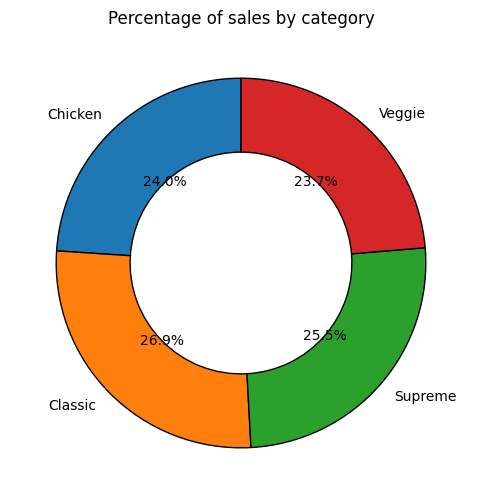

In [164]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
category_percentage = category_sales / category_sales.sum() * 100
plt.figure(figsize = (6,6))
wedgeprops={'edgecolor' : 'black' , 'width':0.4}
plt.pie(category_percentage , labels = category_percentage.index ,autopct = '%1.1f%%' , startangle = 90 , wedgeprops=wedgeprops)
plt.title("Percentage of sales by category")
plt.show()

### • Category & Size Sales Distribution

A doughnut chart showing the **percentage contribution of each pizza category combined with pizza size** to total revenue.  
This visualization helps in understanding **which size performs best within each category**, enabling informed **menu pricing, stock management, and promotional strategy** decisions.

#### **Insights:**
- **Medium and Large sizes** contribute the **highest share across most categories**, indicating strong customer preference for mid-sized pizzas.
- In several categories, **Small sizes contribute the least**, suggesting they are less preferred or deliver lower value perception.
- **Classic (Large)**, **Supreme (Large)**, and **Chicken (Large)** have notable contributions, highlighting that **Large pizzas drive the most revenue** overall.
- The **Veggie category**, though present across sizes, shows relatively **lower contribution**, indicating a smaller customer segment for vegetarian options.
- This distribution emphasizes the importance of maintaining **efficient inventory** for **Medium and Large sizes**, especially in the **Classic and Supreme** pizza categories.


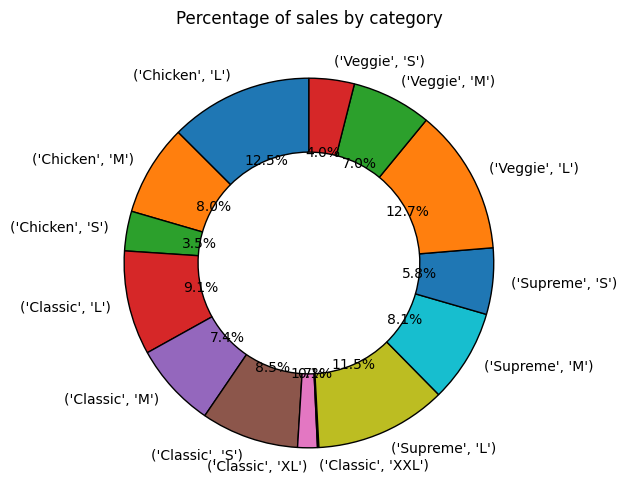

In [165]:
category_sales = df.groupby(['pizza_category','pizza_size'])['total_price'].sum()
category_percentage = category_sales / category_sales.sum() * 100
plt.figure(figsize = (6,6))
wedgeprops={'edgecolor' : 'black' , 'width':0.4}
plt.pie(category_percentage , labels = category_percentage.index ,autopct = '%1.1f%%' , startangle = 90 , wedgeprops=wedgeprops)
plt.title("Percentage of sales by category")
plt.show()

### • Category vs Size Sales Heatmap

A heatmap showing the **percentage contribution of each pizza size within each pizza category**.  
This visualization helps identify **which size performs best in each category** and supports **inventory planning, pricing decisions, and menu optimization**.

#### **Insights:**
- **Large (L)** size pizzas generate the **highest revenue contribution** across most categories, indicating strong customer preference for bigger portions.
- **Medium (M)** size pizzas also contribute significantly, acting as a balanced choice between price and quantity.
- **Small (S)** pizzas contribute **noticeably less** across all categories, suggesting lower demand for smaller portion sizes.
- **XL and XXL** sizes show **little to no contribution**, indicating these sizes are either rarely ordered or not promoted effectively.
- Overall, the heatmap highlights that focusing on **Large and Medium pizzas**, especially in **Classic and Supreme categories**, can maximize revenue, while **Small and XL sizes** may require **re-pricing or promotional strategies** to improve sales.


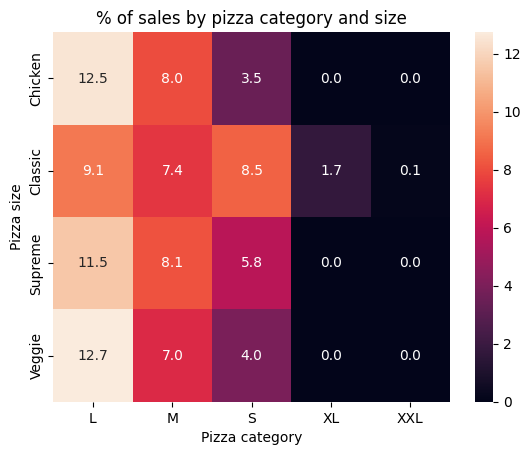

In [166]:
sales_pivot = df.pivot_table(
    index = 'pizza_category' ,
    columns = 'pizza_size',
    values = 'total_price' ,
    aggfunc = 'sum' ,
    fill_value = 0
)

sales_percentage = sales_pivot / sales_pivot.sum().sum() * 100
sns.heatmap(sales_percentage , annot = True ,fmt=".1f")
plt.title("% of sales by pizza category and size")
plt.xlabel("Pizza category")
plt.ylabel("Pizza size")
plt.show()

### • Total Pizzas Sold by Category

A bar chart showing the **total number of pizzas sold in each pizza category**.  
This helps in understanding **which type of pizza is most preferred by customers**, and assists in **menu planning and stock management**.

#### **Insights:**
- **Classic pizzas** are the **most sold category**, indicating strong customer preference for familiar and traditional flavors.
- **Supreme** and **Veggie** pizzas have **moderate sales**, showing balanced demand across mixed topping and vegetarian options.
- **Chicken pizzas** show relatively **lower sales** compared to other categories, suggesting a smaller non-vegetarian customer base or pricing influence.
- The overall distribution suggests that **Classic pizzas should remain a primary focus**, while **promotional efforts** could be used to boost **Chicken** or **Veggie** category sales.


Text(0, 0.5, 'Total pizza sold')

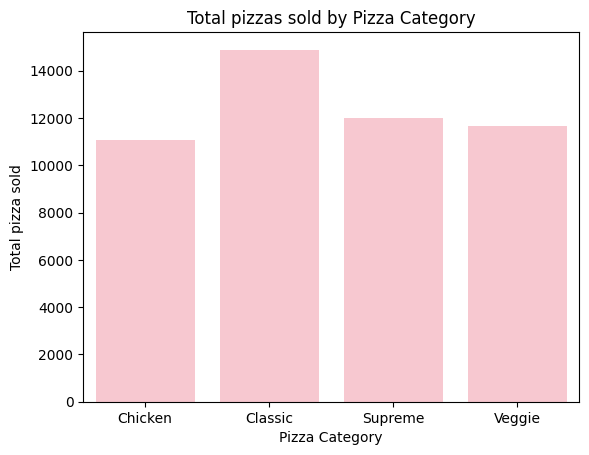

In [167]:
a = df.groupby('pizza_category')['quantity'].sum().reset_index()
sns.barplot(data = a , x = 'pizza_category',y='quantity' , color = 'pink')
plt.title("Total pizzas sold by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total pizza sold")

### • Top 5 Best-Selling Pizzas

A bar chart showing the **top 5 pizzas with the highest sales volume (quantity sold)**.  
This visualization helps identify which pizzas are the **most popular among customers** and should be prioritized in **menu planning and inventory management**.

#### **Insights:**
- The top-selling pizzas contribute significantly to overall demand and should be **kept well-stocked** to avoid shortages.
- These pizzas represent **customer favorites**, indicating strong taste preference patterns.
- Lower-selling pizzas (not shown here) may require **promotional strategies**, bundling offers, or recipe improvements to boost their appeal.
- Focusing on these best-sellers can help improve **sales efficiency** and ensure **consistent customer satisfaction**.


([0, 1, 2, 3, 4],
 [Text(0, 0, 'The Classic Deluxe Pizza'),
  Text(1, 0, 'The Barbecue Chicken Pizza'),
  Text(2, 0, 'The Hawaiian Pizza'),
  Text(3, 0, 'The Pepperoni Pizza'),
  Text(4, 0, 'The Thai Chicken Pizza')])

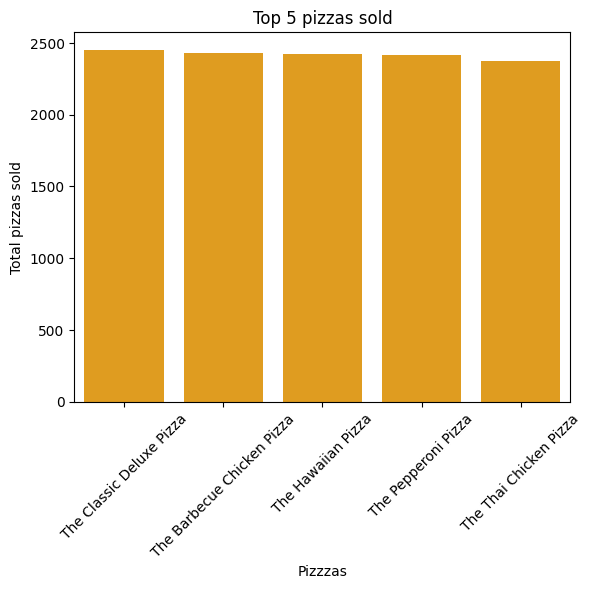

In [168]:
pizza_by_name = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(5).reset_index()
sns.barplot(data= pizza_by_name , x = "pizza_name" , y = 'quantity' , color = 'orange')
plt.title("Top 5 pizzas sold")
plt.xlabel("Pizzzas")
plt.ylabel("Total pizzas sold")
plt.xticks(rotation = 45)